In [23]:
# Dependencies
import numpy as np

import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [26]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [27]:
#  3. Convert the June temperatures to a list.
June_temps = []

June_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()

In [28]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temps_df = pd.DataFrame(June_temps, columns=['date','June Temps'])

June_temps_df.head()

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [29]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [30]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [31]:
# 7. Convert the December temperatures to a list.
Dec_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

In [32]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temps_df = pd.DataFrame(Dec_temps, columns=['date','Dec Temps'])

In [33]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [34]:
#Deeper analysis for Deliverable 3
#finding out avg temps for both months June and Dec
June_temp_df = pd.DataFrame(June_temps, columns = ['date', 'June Temps'])
June_temp_df.head()

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [35]:
#Avg temp for Dec
Dec_temp_df = pd.DataFrame(Dec_temps, columns = ['date', 'Dec Temps'])
Dec_temp_df.head()

,date,Dec Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [36]:
#Avg June temps for every year
June_group = June_temp_df.groupby(pd.DatetimeIndex(June_temp_df['date']).year)
June_avg = June_group.aggregate({'June Temps':np.mean})
June_avg

,June Temps
date,
2010,74.925620
2011,73.938326
2012,74.000000
2013,74.599078
2014,75.027907
2015,74.990148
2016,75.175258
2017,77.219895


In [37]:
#Avg Dec temps for every year
Dec_group = Dec_temp_df.groupby(pd.DatetimeIndex(Dec_temp_df['date']).year)
Dec_avg = Dec_group.aggregate({'Dec Temps': np.mean})
Dec_avg

,Dec Temps
date,
2010,70.208511
2011,70.820628
2012,71.188073
2013,71.094017
2014,69.896861
2015,73.423913
2016,71.130000


In [38]:
#Merge the June and Dec DataFrames together.
June_Dec_df = pd.merge(June_avg, Dec_avg, how = 'inner', on = 'date',
                       sort = True)
June_Dec_df

,June Temps,Dec Temps
date,,
2010,74.925620,70.208511
2011,73.938326,70.820628
2012,74.000000,71.188073
2013,74.599078,71.094017
2014,75.027907,69.896861
2015,74.990148,73.423913
2016,75.175258,71.130000


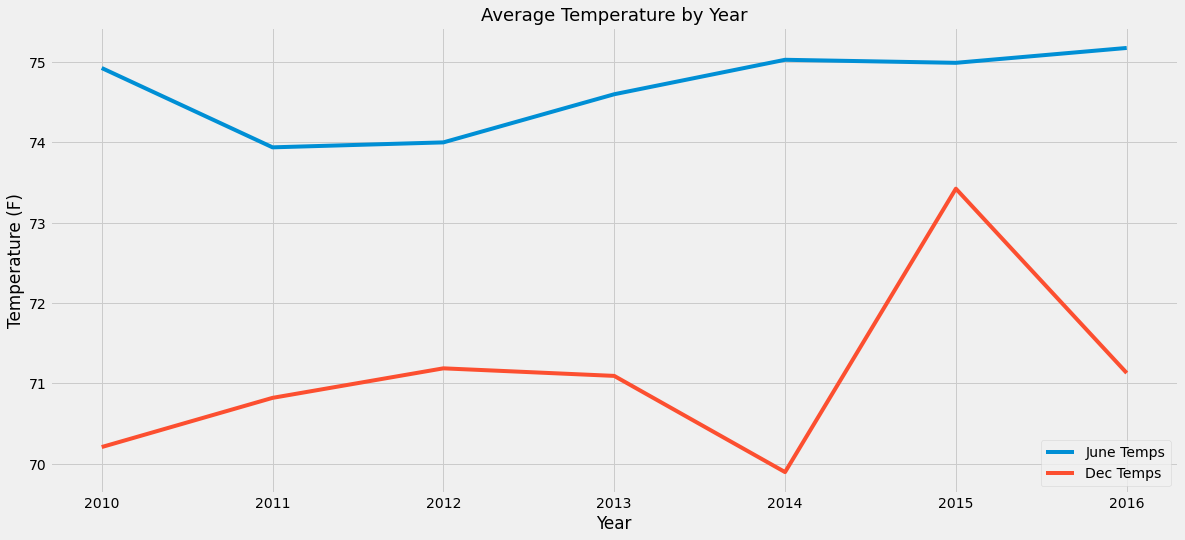

In [41]:
# Plot the June and December temp data
June_Dec_temp = June_Dec_df.plot(figsize = (18,8))
June_Dec_temp.set_title('Average Temperature by Year', fontsize = 18)
June_Dec_temp.set_xlabel("Year")
June_Dec_temp.set_ylabel("Temperature (F)")
June_Dec_temp.grid(True)
plt.savefig("Resources/June_Dec_Temp.png")
plt.show()

In [42]:
#Lastly, checking for average precipation for June and Dec
June_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
Dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

In [43]:
#Store info in a DataFrame
# Create a DataFrame for June and December precipitation
June_prcp_df = pd.DataFrame(June_prcp, columns = ['date','June prcp'])

Dec_prcp_df = pd.DataFrame(Dec_prcp, columns = ['date','Dec prcp'])

In [44]:
#Average June precipation by year
June_group_prcp = June_prcp_df.groupby(pd.DatetimeIndex(June_prcp_df['date']).year)
June_avg_prcp = June_group_prcp.aggregate({'June prcp':np.mean})
June_avg_prcp

,June prcp
date,
2010,0.042241
2011,0.240142
2012,0.097062
2013,0.144195
2014,0.124372
2015,0.125160
2016,0.212312
2017,0.120000


In [45]:
#Average Dec precipation by year
Dec_group_prcp = Dec_prcp_df.groupby(pd.DatetimeIndex(Dec_prcp_df['date']).year)
Dec_avg_prcp = Dec_group_prcp.aggregate({'Dec prcp':np.mean})
Dec_avg_prcp

,Dec prcp
date,
2010,0.459087
2011,0.201581
2012,0.089604
2013,0.169014
2014,0.188439
2015,0.169506
2016,0.199494


In [46]:
#Merge the two precipation DataFrames
June_Dec_prcp_df = pd.merge(June_avg_prcp, Dec_avg_prcp, how = 'inner', on = 'date',
                       sort = True)
June_Dec_prcp_df

,June prcp,Dec prcp
date,,
2010,0.042241,0.459087
2011,0.240142,0.201581
2012,0.097062,0.089604
2013,0.144195,0.169014
2014,0.124372,0.188439
2015,0.125160,0.169506
2016,0.212312,0.199494


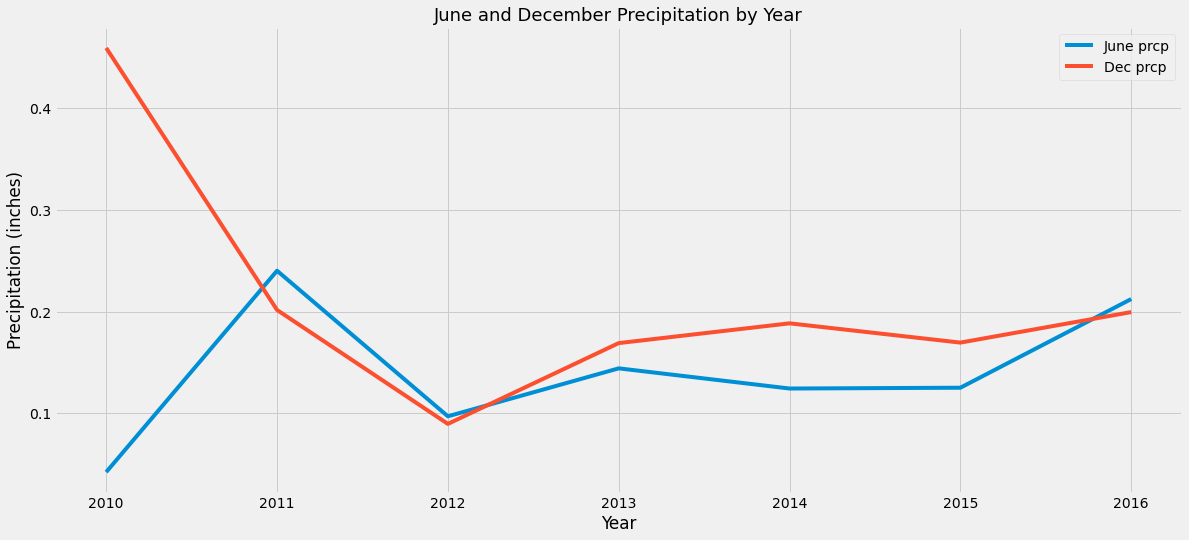

In [48]:
#Plot the June and Dec prcp data
June_Dec_prcp = June_Dec_prcp_df.plot(figsize = (18,8))
June_Dec_prcp.set_title('June and December Precipitation by Year', fontsize = 18)
June_Dec_prcp.set_xlabel('Year')
June_Dec_prcp.set_ylabel('Precipitation (inches)')
June_Dec_prcp.grid(True)
plt.savefig('Resources/June_Dec_prcp.png')
plt.show()